In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Importing the dataframe

import pandas as pd
df = pd.read_excel('train.xlsx')
print(df.shape)
df.head()

(2061, 3)


,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1
1,very practical and easy to use,app is user-friendly,1
2,this app is very good for video conferencing.,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim import corpora,models
import seaborn as sns
import numpy as np

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_excel('train.xlsx')

# Instantiate Vader sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each row
def get_sentiment_score(row):
    return sia.polarity_scores(row['text'])['compound']

# Apply the function to each row to get the sentiment score
data['sentiment_score'] = data.apply(get_sentiment_score, axis=1)

# Define a threshold to classify positive/negative sentiment
threshold = 0

# Classify sentiment based on the threshold
data['sentiment_label'] = data['sentiment_score'].apply(lambda score: 1 if score >= threshold else 0)

# Print the first 10 rows of the data
data.sample(10)

,text,reason,label,sentiment_score,sentiment_label
431,"the graphics are very bad, and it takes time t...",want to load skins,1,-0.5849,0
886,no virtual background or blur funtion for sams...,want to use virtual background for samsung gal...,1,-0.2960,0
107,"this new zoom app is so so annoying,always dow...",app keeps downloading emoji package,1,0.0000,1
1607,but soon the screen turns black and,app shows black screen,1,0.0000,1
102,it is the best app for chatting and meetings,app is good for meetings and chatting,1,0.6369,1
603,"support does not work, there is no way to fix ...",support option does not work,1,0.1280,1
1409,"i can not put emojis from my cell, that is the...",want to put emojis on cell,1,0.0000,1
1977,movie audio is often too low and of poor quality.,video sound is low,1,-0.6369,0
1522,i can not change my language to russian or ukr...,want to change russian language,1,0.0000,1
1770,worst app not showing live cricket properly,unable to view live cricket,1,-0.6249,0


In [ ]:
data.sentiment_label.value_counts()

,count
sentiment_label,
1,1408
0,653


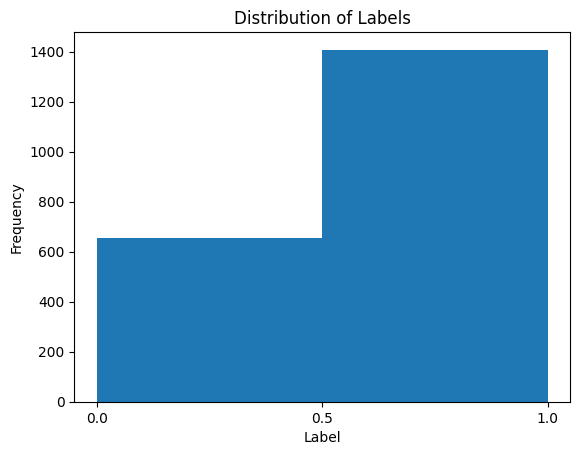

In [ ]:
#distribution of the label
plt.hist(data['sentiment_label'], bins=[0,0.5,1], align='mid')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0,0.5,1])  # Set x-axis ticks directly
plt.title('Distribution of Labels')
plt.show()

In [ ]:

import nltk
from nltk.corpus import stopwords


# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Concatenate all the words in the "reason" column
all_words = ' '.join(data['reason']).split()

# Remove stop words from the concatenated words
all_words_clean = [word for word in all_words if word.lower() not in stop_words]

# Count the frequency of each word
word_freq = pd.Series(all_words_clean).value_counts().sort_values(ascending=False)

# Print the top 10 most frequent words
print(word_freq.head(10))

want          840
app           362
good          222
unable        219
video         118
use           104
zoom           94
background     90
screen         87
bad            85
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


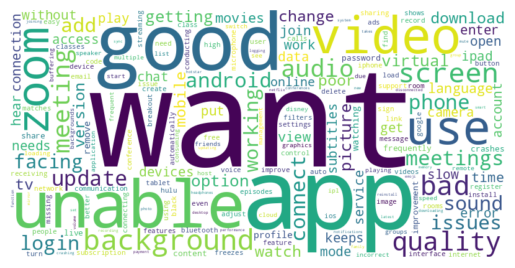

In [ ]:
# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

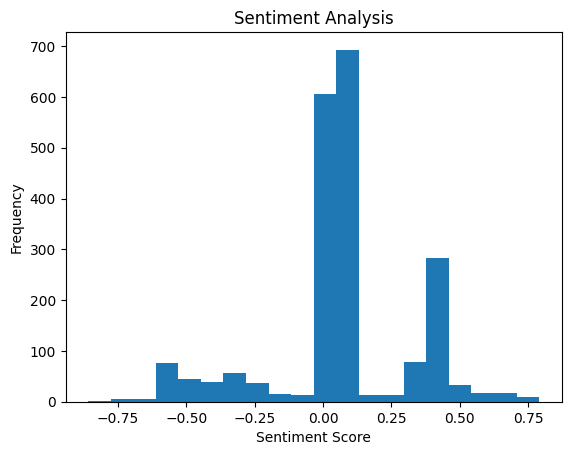

In [ ]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['reason'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
plt.hist(data['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()

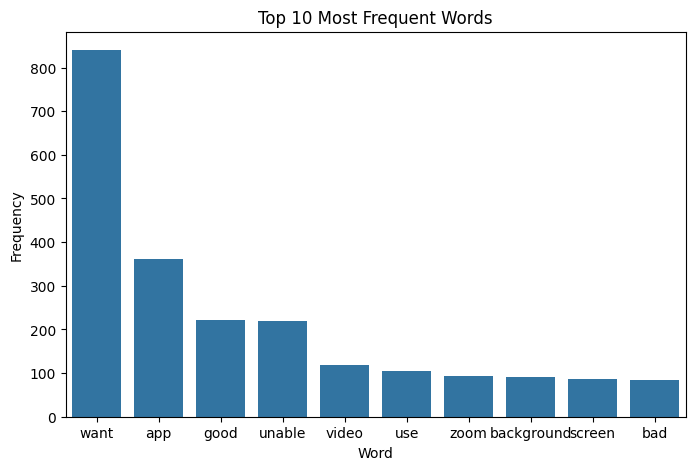

In [ ]:
# Bar Chart
word_freq = pd.Series(all_words_clean).value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=word_freq[:10].index, y=word_freq[:10])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


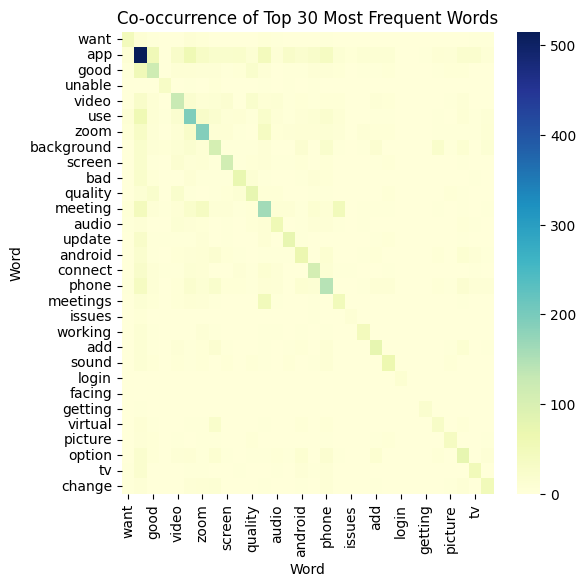

In [ ]:
# Heatmap
word_freq_top50 = pd.Series(all_words_clean).value_counts().sort_values(ascending=False)[:30]
co_occurrence = pd.DataFrame(index=word_freq_top50.index, columns=word_freq_top50.index)
for i in word_freq_top50.index:
    for j in word_freq_top50.index:
        co_occurrence.loc[i,j] = sum([1 for text in df['text'] if i in text and j in text])
plt.figure(figsize=(6,6))
sns.heatmap(co_occurrence.astype(int), cmap="YlGnBu")
plt.title('Co-occurrence of Top 30 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Word')
plt.show()


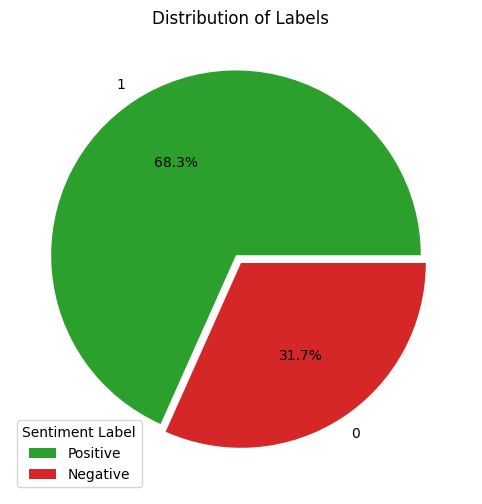

In [ ]:
import matplotlib.pyplot as plt

# Create data
label_counts = data['sentiment_label'].value_counts()

# Define colors and explode for the pie chart
colors = ['tab:green', 'tab:red']
explode = [0.05, 0]

# Create the pie chart
plt.figure(figsize=(8,6))
plt.pie(label_counts, colors=colors, labels=label_counts.index, explode=explode, autopct='%1.1f%%')

# Add a legend
plt.legend(title='Sentiment Label', loc='best', labels=['Positive', 'Negative'])

# Add a title
plt.title('Distribution of Labels')

# Show the plot
plt.show()


In [ ]:
# Topic modeling
texts = [doc.split() for doc in data['reason']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.145*"to" + 0.073*"on" + 0.063*"unable" + 0.060*"want" + 0.024*"use"')
(1, '0.109*"is" + 0.078*"app" + 0.039*"not" + 0.036*"bad" + 0.031*"working"')
(2, '0.110*"good" + 0.082*"for" + 0.048*"movies" + 0.047*"quality" + 0.038*"app"')
(3, '0.163*"to" + 0.087*"want" + 0.045*"unable" + 0.025*"use" + 0.025*"with"')
(4, '0.090*"to" + 0.054*"want" + 0.033*"content" + 0.030*"frequent" + 0.024*"from"')


In [ ]:
data


,text,reason,label,sentiment_score,sentiment_label,sentiment
0,this is an amazing app for online classes!but,good app for conducting online classes,1,0.4404,1,Positive
1,very practical and easy to use,app is user-friendly,1,0.0000,1,Neutral
2,this app is very good for video conferencing.,good for video conferencing,1,0.4404,1,Positive
3,i can not download this zoom app,unable to download zoom app,1,0.0000,1,Neutral
4,i am not able to download this app,want to download the app,1,0.0772,1,Positive
...,...,...,...,...,...,...
2056,i am not getting jio tv properly.,unable to use with jio tv,1,0.0000,1,Neutral
2057,(learn from the netflix interface),netflix ui is better,1,0.4404,1,Positive
2058,"hello,\ndisney+ must also be installed on chro...",unable to use disney on chromecast,1,0.0000,1,Neutral
2059,it is a shame that disney+ does not work on tv...,unable to use disney plus on tv,1,0.0000,0,Neutral


In [ ]:

original_positives_df = data[data['sentiment_label'] == 1]
original_positives_df.shape

(1408, 6)

In [ ]:
original_negatives_df = data[data['sentiment_label'] == 0]
original_negatives_df.shape

(653, 6)

In [ ]:
from textblob import TextBlob

# Generate negated versions of the positive examples
neg_data = original_positives_df.copy()

neg_data['text'] = neg_data['text'].apply(lambda x: " ".join(["not " + w for w in x.split()]))

# Label the negated examples as negative (0)
neg_data['sentiment_label'] = 0

In [ ]:
print(neg_data.shape)
neg_data.head(7)

(1408, 6)


,text,reason,label,sentiment_score,sentiment_label,sentiment
0,not this not is not an not amazing not app not...,good app for conducting online classes,1,0.4404,0,Positive
1,not very not practical not and not easy not to...,app is user-friendly,1,0.0000,0,Neutral
2,not this not app not is not very not good not ...,good for video conferencing,1,0.4404,0,Positive
3,not i not can not not not download not this no...,unable to download zoom app,1,0.0000,0,Neutral
4,not i not am not not not able not to not downl...,want to download the app,1,0.0772,0,Positive
5,not zoom not is not not not working not properly,app is not working,1,0.0000,0,Neutral
6,not zoom not is not an not excellent not meeti...,good app for conducting online meeting,1,0.4404,0,Positive


In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_positive_oversampled = original_positives_df.sample(653, replace=True)
df_positive_oversampled.shape

(653, 6)

In [ ]:
df_negative_oversampled = pd.concat([neg_data,original_negatives_df],ignore_index =True)
df_negative_oversampled.shape

(2061, 6)

In [ ]:
df_positive_oversampled = pd.concat([df_positive_oversampled,original_positives_df],ignore_index=True)
df_positive_oversampled.shape

(3469, 6)

In [ ]:
# Combine the negated examples with the original positive examples
df_balanced = pd.concat([df_positive_oversampled, df_negative_oversampled], ignore_index=True)
df_balanced.sentiment_label.value_counts()

,count
sentiment_label,
1,4877
0,2061


In [ ]:

df_balanced.sample(5)

,text,reason,label,sentiment_score,sentiment_label,sentiment
5984,not but not soon not the not screen not turns ...,app shows black screen,1,0.0000,0,Neutral
5463,not greater not for not virtual not gatherings,good for virtual gatherings,1,0.4404,0,Positive
2362,"the quality of the meetings, both sound and im...",good quality of meetings,1,0.4404,1,Positive
4445,it is a good app for korean lessons,good for korean lessons,1,0.4404,1,Positive
2824,very baad quality of voice,good quality of voice,1,0.4404,1,Positive


In [ ]:
pip install -q tf-models-official==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import re

In [ ]:
def clean(text):
  clean_text = re.sub(r'[^\s]','',text)
  return clean_text

In [ ]:
df_balanced['text'] = df_balanced.text.apply(clean)
df_balanced['reason'] = df_balanced.text.apply(clean)
df_balanced.sample(6)

,text,reason,label,sentiment_score,sentiment_label,sentiment
4436,,,1,0.0772,1,Positive
3501,,,1,0.0772,1,Positive
6455,,,1,0.0772,0,Positive
2167,,,1,0.0772,1,Positive
3696,,,1,0.4588,1,Positive
6814,,,1,0.0000,0,Neutral


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['sentiment_label'], test_size=0.33, random_state=42)

In [ ]:
pip install tensorflow-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
import tensorflow as tf

# Assuming your input data has 10 features
input_shape = (10,)

model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=input_shape),
    # Hidden layers (adjust as needed)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    # Output layer (for binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
X_train.shape,y_train.shape

((4648,), (4648,))

In [ ]:
print(X_train.shape)
X_train.sample(5)

(4648,)


,text
1583,
2366,
6399,
2545,
152,


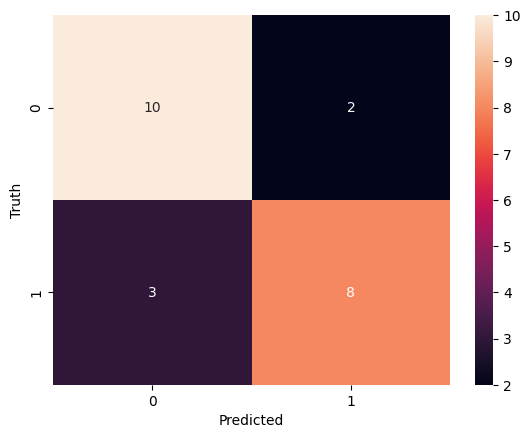

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt

# Assuming you have a confusion matrix stored in a NumPy array or similar
cm = [[10, 2],
      [3, 8]]

# Create the heatmap
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()